# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.538  1  0.784 0.377 0.004   
                             age        0.059  1  0.087 0.769 0.000   
                             Kiel       2.305  1  3.361 0.068 0.017   
                             Magdeburg  5.774  1  8.419 0.004 0.042   
                             Sweden     9.139  1 13.326 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.113  1  0.117 0.733 0.001   
                             age        0.284  1  0.293 0.589 0.002   
                             Kiel       0.123  1  0.127 0.722 0.001   
                             Magdeburg  1.817  1  1.876 0.172 0.010   
                             Sweden    17.948  1 18.527 0.000 0.088   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.424  0.539    False  
                             age               0.114  0.859    False  
                             Kiel              1.166  0.154    False  
                             Magdeburg         2.382  0.016     True  
                             Sweden            3.471  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.135  0.832    False  
                             age               0.230  0.720    False  
                             Kiel              0.141  0.825    False  
                             Magdeburg         0.763  0.311    False  
                             Sweden            4.573  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.752  1  4.890 0.028 0.025   
                             age        0.012  1  0.079 0.779 0.000   
                             Kiel       0.392  1  2.551 0.112 0.013   
                             Magdeburg  0.833  1  5.419 0.021 0.028   
                             Sweden     2.211  1 14.385 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         4.943  1  2.569 0.111 0.013   
                             age        0.166  1  0.086 0.769 0.000   
                             Kiel      10.151  1  5.275 0.023 0.027   
                             Magdeburg 25.617  1 13.312 0.000 0.065   
                             Sweden     2.518  1  1.308 0.254 0.007   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.550  0.072    False  
                             age               0.109  0.858    False  
                             Kiel              0.951  0.216    False  
                             Magdeburg         1.679  0.057    False  
                             Sweden            3.699  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.956  0.214    False  
                             age               0.114  0.852    False  
                             Kiel              1.644  0.061    False  
                             Magdeburg         3.468  0.002     True  
                             Sweden            0.595  0.400    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.377         0.424  0.539    False   
                             age       0.769         0.114  0.859    False   
                             Kiel      0.068         1.166  0.154    False   
                             Magdeburg 0.004         2.382  0.016     True   
                             Sweden    0.000         3.471  0.002     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.733         0.135  0.832    False   
                             age       0.589         0.230  0.720    False   
                             Kiel      0.722         0.141  0.825    False   
                             Magdeburg 0.172         0.763  0.311    False   
                             Sweden    0.000         4.573  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.028         1.550  0.072    False  
                             age       0.779         0.109  0.858    False  
                             Kiel      0.112         0.951  0.216    False  
                             Magdeburg 0.021         1.679  0.057    False  
                             Sweden    0.000         3.699  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.111         0.956  0.214    False  
                             age       0.769         0.114  0.852    False  
                             Kiel      0.023         1.644  0.061    False  
                             Magdeburg 0.000         3.468  0.002     True  
                             Sweden    0.254         0.595  0.400    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.488     0.335     0.247         2.739     0.314
std       0.302         5.354     0.330     0.300         5.173     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.337     0.015     0.002         0.362     0.008
50%       0.119         0.925     0.237     0.092         1.035     0.185
75%       0.460         2.432     0.614     0.435         2.675     0.580
max       0.999       149.679     0.999     1.000        81.340     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.377         0.424   
A0A024R0T9;K7ER74;P02655                           AD     0.059         1.231   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.122         0.914   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.575         0.241   
A0A075B6H7                                         AD     0.204         0.691   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.047         1.324   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.542         0.266   
S4R3U6                                             AD     0.733         0.135   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.539    False   
A0A024R0T9;K7ER74;P02655                           AD      0.138    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.242    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.708    False   
A0A075B6H7                                         AD      0.350    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.116    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.683    False   
S4R3U6                                             AD      0.832    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.028         1.550   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.527   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.393         0.406   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.293         0.534   
A0A075B6H7                                         AD     0.281         0.551   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.045         1.344   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.754         0.122   
S4R3U6                                             AD     0.111         0.956   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.072    False  
A0A024R0T9;K7ER74;P02655                           AD      0.075    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.543    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.443    False  
A0A075B6H7                                         AD      0.430    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.417     0.332     0.249         1.489     0.322
std       0.290         1.631     0.316     0.291         1.790     0.316
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.365     0.035     0.010         0.371     0.030
50%       0.115         0.939     0.232     0.112         0.950     0.216
75%       0.432         1.970     0.591     0.426         2.009     0.571
max       0.999        22.313     0.999     0.999        25.570     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1021,993


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.377         0.424  0.539   
A0A024R0T9;K7ER74;P02655                           0.059         1.231  0.138   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.122         0.914  0.242   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.575         0.241  0.708   
A0A075B6H7                                         0.204         0.691  0.350   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.047         1.324  0.116   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.542         0.266  0.683   
S4R3U6                                             0.733         0.135  0.832   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.028   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.393   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.293   
A0A075B6H7                                            False 0.281   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.045   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.754   
S4R3U6                                                False 0.111   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.550  0.072   
A0A024R0T9;K7ER74;P02655                                   1.527  0.075   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.406  0.543   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.534  0.443   
A0A075B6H7                                                 0.551  0.430   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.344  0.105   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.122  0.842   
S4R3U6                                                     0.956  0.214   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    956
PI (yes) - QRILC (yes)   363
PI (no)  - QRILC (yes)    65
PI (yes) - QRILC (no)     37
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.012         1.935  0.038     True   
A0A087WWT2;Q9NPD7                     0.043         1.371  0.107    False   
A0A087X1G7;A0A0B4J1S4;O60613          0.018         1.736  0.055    False   
A0A0A0MTP9;F8VZI9;Q9BWQ8              0.024         1.618  0.068    False   
A0A0A6YYJ2;P42857;P42857-2            0.026         1.586  0.072    False   
...                                     ...           ...    ...      ...   
Q9P0K9                                0.023         1.629  0.067    False   
Q9P2E7;Q9P2E7-2                       0.022         1.660  0.063    False   
Q9UKB5                                0.005         2.267  0.020     True   
Q9UNW1                                0.008         2.075  0.029     True   
Q9UQ52                                0.141         0.850  0.270    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.191         0.718  0.324    False   
A0A087WWT2;Q9NPD7                     0.011         1.969  0.033     True   
A0A087X1G7;A0A0B4J1S4;O60613          0.014         1.841  0.042     True   
A0A0A0MTP9;F8VZI9;Q9BWQ8              0.011         1.970  0.033     True   
A0A0A6YYJ2;P42857;P42857-2            0.016         1.802  0.045     True   
...                                     ...           ...    ...      ...   
Q9P0K9                                0.010         2.021  0.030     True   
Q9P2E7;Q9P2E7-2                       0.013         1.873  0.039     True   
Q9UKB5                                0.061         1.215  0.133    False   
Q9UNW1                                0.129         0.890  0.240    False   
Q9UQ52                                0.005         2.287  0.018     True   

                                           data  
                                      frequency  
protein groups                                   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087X1G7;A0A0B4J1S4;O60613                184  
A0A0A0MTP9;F8VZI9;Q9BWQ8                    193  
A0A0A6YYJ2;P42857;P42857-2                  111  
...                                         ...  
Q9P0K9                                      192  
Q9P2E7;Q9P2E7-2                             196  
Q9UKB5                                      148  
Q9UNW1                                      171  
Q9UQ52                                      188  

[102 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.539,0.072,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.138,0.075,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.242,0.543,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.708,0.443,196,PI (no) - QRILC (no)
A0A075B6H7,0.350,0.430,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.116,0.105,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P43004;P43004-2;P43004-3,0.962,0.024,89,PI (no) - QRILC (yes),0.938
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.839,0.016,69,PI (no) - QRILC (yes),0.823
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.770,0.020,86,PI (no) - QRILC (yes),0.750
F6SYF8;Q9UBP4,0.514,0.005,196,PI (no) - QRILC (yes),0.509
B1AJQ6;Q86Y82,0.032,0.527,49,PI (yes) - QRILC (no),0.495
...,...,...,...,...,...
K7ERI9;P02654,0.040,0.054,196,PI (yes) - QRILC (no),0.014
A0A087X1G7;A0A0B4J1S4;O60613,0.055,0.042,184,PI (no) - QRILC (yes),0.013
Q7Z7H5;Q7Z7H5-3,0.046,0.056,176,PI (yes) - QRILC (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


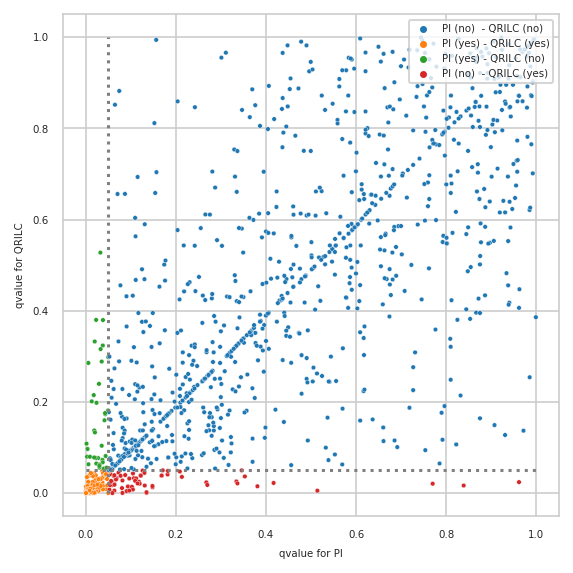

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


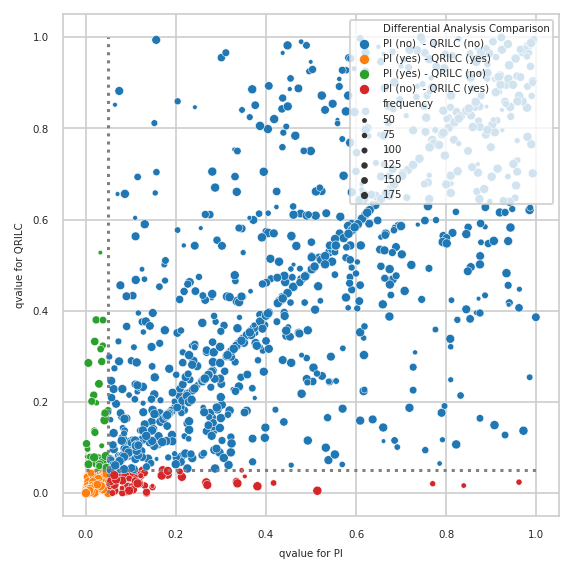

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out